In [1]:
# Python Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reading the dataset and displaying the top 5 records with Dataframe.head() function. The datset is completely based on the Indian ecomomy.
quarterly_data=pd.read_csv("fred_qgdp_growth_rate.csv")
quarterly_data.shape

(46, 2)

In [3]:
from tabulate import tabulate

In [4]:
#Displaying the top 5 records with Dataframe.head() function
print(tabulate(quarterly_data.head(), headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤═══════════════╤═══════════════════╕
│    │ Time Period   │   GDP Growth Rate │
╞════╪═══════════════╪═══════════════════╡
│  0 │ 01/07/2011    │       -0.00384855 │
├────┼───────────────┼───────────────────┤
│  1 │ 01/10/2011    │        1.62889    │
├────┼───────────────┼───────────────────┤
│  2 │ 01/01/2012    │        1.38078    │
├────┼───────────────┼───────────────────┤
│  3 │ 01/04/2012    │        1.15795    │
├────┼───────────────┼───────────────────┤
│  4 │ 01/07/2012    │        1.794      │
╘════╧═══════════════╧═══════════════════╛


In [5]:
#Let's find out the datatype of each feature 
quarterly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time Period      46 non-null     object 
 1   GDP Growth Rate  46 non-null     float64
dtypes: float64(1), object(1)
memory usage: 864.0+ bytes


In [6]:
#Let's check any null values in dataset
quarterly_data.isnull().sum()

Time Period        0
GDP Growth Rate    0
dtype: int64

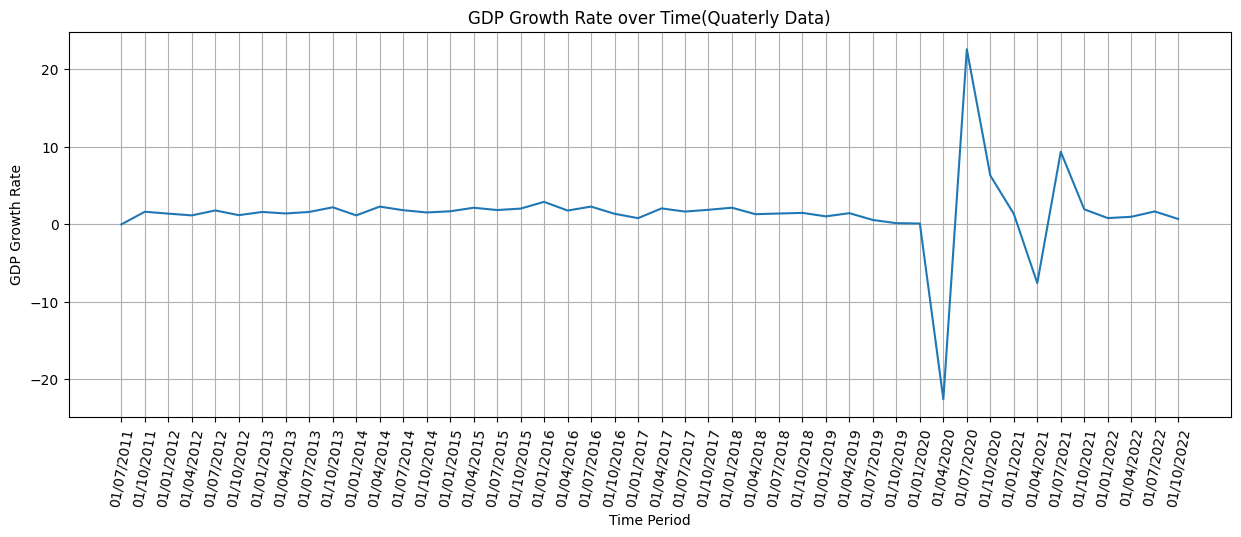

In [7]:
#Let's visualize the GDP growth rate over the time (Quaterly basis)
plt.figure(figsize=(15,5))
# Create the line graph
plt.plot(quarterly_data['Time Period'], quarterly_data['GDP Growth Rate'])
# Customize the graph
plt.xlabel('Time Period')
plt.ylabel('GDP Growth Rate')
plt.xticks(rotation = 80)
plt.title('GDP Growth Rate over Time(Quaterly Data)')
plt.grid(True)

# Display the graph
plt.show()

In [8]:
# Calculate recession based on quarterly GDP growth
quarterly_data['Recession'] = ((quarterly_data['GDP Growth Rate'] < 0) & (quarterly_data['GDP Growth Rate'].shift(1) < 0))

# Fill missing values with False (since the first quarter cannot be in a recession)
quarterly_data['Recession'].fillna(False, inplace=True)

In [9]:
print(tabulate(quarterly_data.head(), headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤═══════════════╤═══════════════════╤═════════════╕
│    │ Time Period   │   GDP Growth Rate │ Recession   │
╞════╪═══════════════╪═══════════════════╪═════════════╡
│  0 │ 01/07/2011    │       -0.00384855 │ False       │
├────┼───────────────┼───────────────────┼─────────────┤
│  1 │ 01/10/2011    │        1.62889    │ False       │
├────┼───────────────┼───────────────────┼─────────────┤
│  2 │ 01/01/2012    │        1.38078    │ False       │
├────┼───────────────┼───────────────────┼─────────────┤
│  3 │ 01/04/2012    │        1.15795    │ False       │
├────┼───────────────┼───────────────────┼─────────────┤
│  4 │ 01/07/2012    │        1.794      │ False       │
╘════╧═══════════════╧═══════════════════╧═════════════╛


In [10]:
# Identify the time period where recession happen.
recession_periods = quarterly_data.loc[quarterly_data['Recession'] == True, 'Time Period'].tolist()
print(recession_periods)

[]


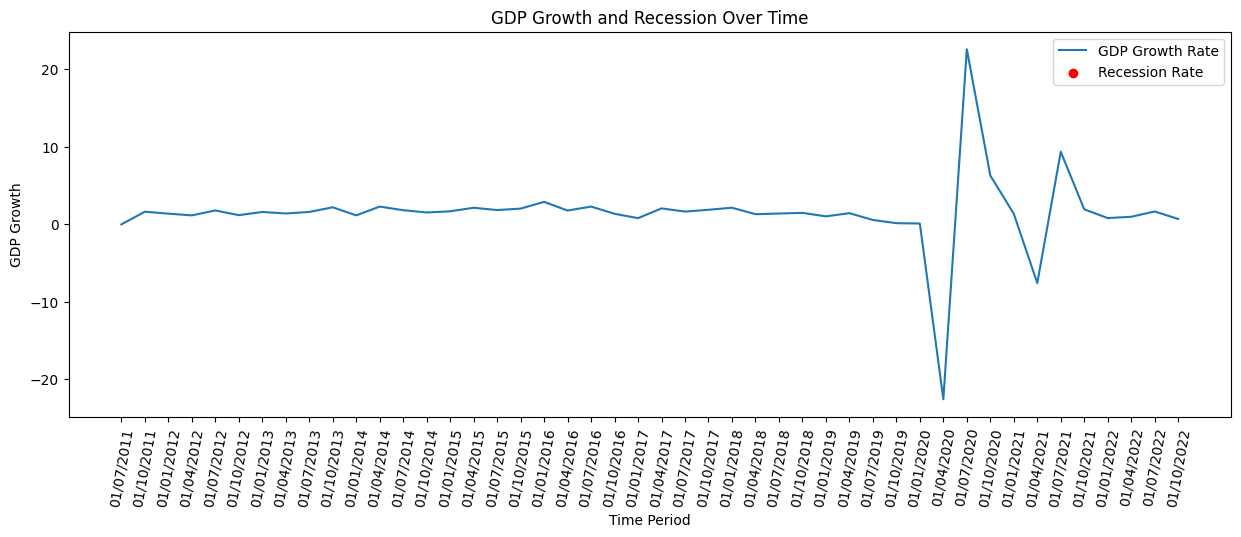

In [11]:
# Let's visualize the recession period in comparison to GDP growth 
plt.figure(figsize=(15,5))
# Filter the data for recession periods
recession_data = quarterly_data[quarterly_data['Recession'] == True]

# Plot the GDP growth
plt.plot(quarterly_data['Time Period'], quarterly_data['GDP Growth Rate'], label='GDP Growth Rate')

# Plot recession periods
plt.scatter(recession_data['Time Period'], recession_data['GDP Growth Rate'], color='Red', label='Recession Rate')

# Customize the plot
plt.xlabel('Time Period')
plt.ylabel('GDP Growth')
plt.xticks(rotation=80)
plt.title('GDP Growth and Recession Over Time')
plt.legend()

# Display the plot
plt.show()

In [12]:
#Observation
#Blue line shows the overall trend in GDP growth rate over time and since there are no red dots found on the graph so we can 
#conclude that India has never entered into recession.